In [1]:
import pandas as pd

df = pd.read_csv('exams.csv')
df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88
996,male,group C,high school,free/reduced,none,62
997,female,group C,high school,free/reduced,completed,59
998,female,group D,some college,standard,completed,68


In [2]:
df.dtypes

gender                    object
race/ethnicity            object
parent_education_level    object
lunch                     object
test_prep_course          object
math                       int64
dtype: object

In [3]:
df.isnull().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
dtype: int64

In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-'*40)

gender
['female' 'male']
----------------------------------------
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------
parent_education_level
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------
lunch
['standard' 'free/reduced']
----------------------------------------
test_prep_course
['none' 'completed']
----------------------------------------
math
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
----------------------------------------


# Does location of each group come from different distribution?

# Gender

In [5]:
# Check normality

from scipy import stats

df_gender = df[['gender', 'math']]
list_gender_name = df_gender['gender'].unique()

for i in sorted(list_gender_name):
    print(i)
    print('len',i,' : ',len(df_gender[df_gender['gender']==i]))
    print('p-value : ' , stats.kstest(df_gender[df_gender['gender']==i]['math'], 'norm').pvalue)
    print('-'*40)

female
len female  :  518
p-value :  0.0
----------------------------------------
male
len male  :  482
p-value :  0.0
----------------------------------------


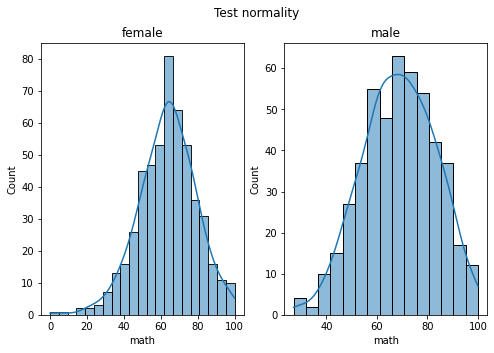

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=len(list_gender_name), figsize=(4*len(list_gender_name), 5))
fig.suptitle('Test normality')

for i in range(len(list_gender_name)):
    sns.histplot(df_gender[df_gender['gender']==list_gender_name[i]]['math'],kde=True,ax=axes[i]).set(title=list_gender_name[i])

2 groups are non-normal -> using non-parametric test

In [7]:
print('p-value : ',stats.ranksums(df_gender[df_gender['gender']==list_gender_name[0]]['math'], 
                                    df_gender[df_gender['gender']==list_gender_name[1]]['math'],alternative='less').pvalue)
#wilcoxon rank sum test (one-tail)

p-value :  2.1516641746232147e-07


female < male 

# Race

In [8]:
#Check normality

df_race = df[['race/ethnicity', 'math']]
list_race_name = sorted(df_race['race/ethnicity'].unique())

for i in list_race_name:
    print(i)
    print('len',i,' : ',len(df_race[df_race['race/ethnicity']==i]))
    print('p-value : ' , stats.kstest(df_race[df_race['race/ethnicity']==i]['math'], 'norm').pvalue)
    print('-'*40)

group A
len group A  :  89
p-value :  0.0
----------------------------------------
group B
len group B  :  190
p-value :  0.0
----------------------------------------
group C
len group C  :  319
p-value :  0.0
----------------------------------------
group D
len group D  :  262
p-value :  0.0
----------------------------------------
group E
len group E  :  140
p-value :  0.0
----------------------------------------


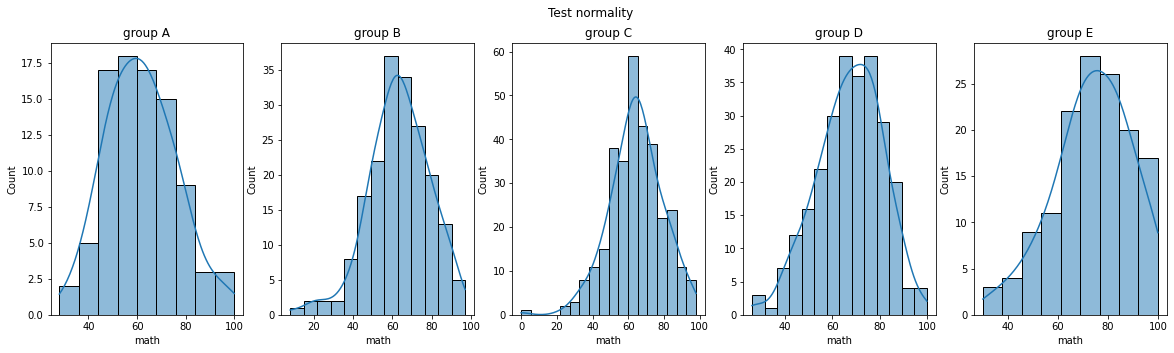

In [9]:
fig, axes = plt.subplots(ncols=len(list_race_name), figsize=(4*len(list_race_name), 5))
fig.suptitle('Test normality')

for i in range(len(list_race_name)):
    sns.histplot(df_race[df_race['race/ethnicity']==list_race_name[i]]['math'],kde=True,ax=axes[i]).set(title=list_race_name[i])

In [10]:
print('p-value : ',stats.kruskal(df_race[df_race['race/ethnicity']==list_race_name[0]]['math'], 
                                df_race[df_race['race/ethnicity']==list_race_name[1]]['math'],
                                df_race[df_race['race/ethnicity']==list_race_name[2]]['math'], 
                                df_race[df_race['race/ethnicity']==list_race_name[3]]['math'],
                                df_race[df_race['race/ethnicity']==list_race_name[4]]['math']).pvalue)
# differ 

p-value :  1.1906568165839682e-11


At least 1 pair is different in median

In [11]:
data_race=[]

for i in list_race_name:
    data_race.append(df_race[df_race['race/ethnicity']==i])

for i in range(len(data_race)-1):
    if i==0:
        start=1
    elif i==1:
        start=2
    elif i==2:
        start=3
    elif i==3:
        start=4
    for j in range(start,len(data_race)):
        print(list_race_name[i] ,' vs ',list_race_name[j])
        print(list_race_name[i] ,' < ',list_race_name[j],'?')
        print('p-value : ',stats.ranksums(data_race[i]['math'], data_race[j]['math'],alternative='less').pvalue)
        if stats.ranksums(data_race[i]['math'], data_race[j]['math'],alternative='less').pvalue < 0.05:
            print('result ',list_race_name[i],' < ',list_race_name[j])
        else:
            print(list_race_name[i] ,' > ',list_race_name[j],'?')
            print('p-value : ',stats.ranksums(data_race[i]['math'], data_race[j]['math'],alternative='greater').pvalue)
            if stats.ranksums(data_race[i]['math'], data_race[j]['math'],alternative='greater').pvalue < 0.05:
                print('result ',list_race_name[i],' > ',list_race_name[j])
            else:
                print('result ',list_race_name[i],' = ',list_race_name[j])
        print('-'*40)
#wilcoxon rank sum test (one-tail)

group A  vs  group B
group A  <  group B ?
p-value :  0.08787044816326
group A  >  group B ?
p-value :  0.91212955183674
result  group A  =  group B
----------------------------------------
group A  vs  group C
group A  <  group C ?
p-value :  0.027861826861397612
result  group A  <  group C
----------------------------------------
group A  vs  group D
group A  <  group D ?
p-value :  0.00019128485560149314
result  group A  <  group D
----------------------------------------
group A  vs  group E
group A  <  group E ?
p-value :  3.809373724405942e-09
result  group A  <  group E
----------------------------------------
group B  vs  group C
group B  <  group C ?
p-value :  0.2636609321222334
group B  >  group C ?
p-value :  0.7363390678777666
result  group B  =  group C
----------------------------------------
group B  vs  group D
group B  <  group D ?
p-value :  0.0027236149187919723
result  group B  <  group D
----------------------------------------
group B  vs  group E
group B  <  gro

In [12]:
print('p-value : ',stats.kruskal(data_race[0]['math'], 
                                data_race[1]['math'],
                                data_race[2]['math']).pvalue)
# A=B=C

p-value :  0.15736300280904847


A=B=C<D<E

# parent_education_level

In [13]:
#Check normality

df_level = df[['parent_education_level', 'math']]
list_level_name = sorted(df_level['parent_education_level'].unique())

for i in list_level_name:
    print(i)
    print('len',i,' : ',len(df_level[df_level['parent_education_level']==i]))
    print('p-value : ' , stats.kstest(df_level[df_level['parent_education_level']==i]['math'], 'norm').pvalue)
    print('-'*40)

associate's degree
len associate's degree  :  222
p-value :  0.0
----------------------------------------
bachelor's degree
len bachelor's degree  :  118
p-value :  0.0
----------------------------------------
high school
len high school  :  196
p-value :  0.0
----------------------------------------
master's degree
len master's degree  :  59
p-value :  0.0
----------------------------------------
some college
len some college  :  226
p-value :  0.0
----------------------------------------
some high school
len some high school  :  179
p-value :  0.0
----------------------------------------


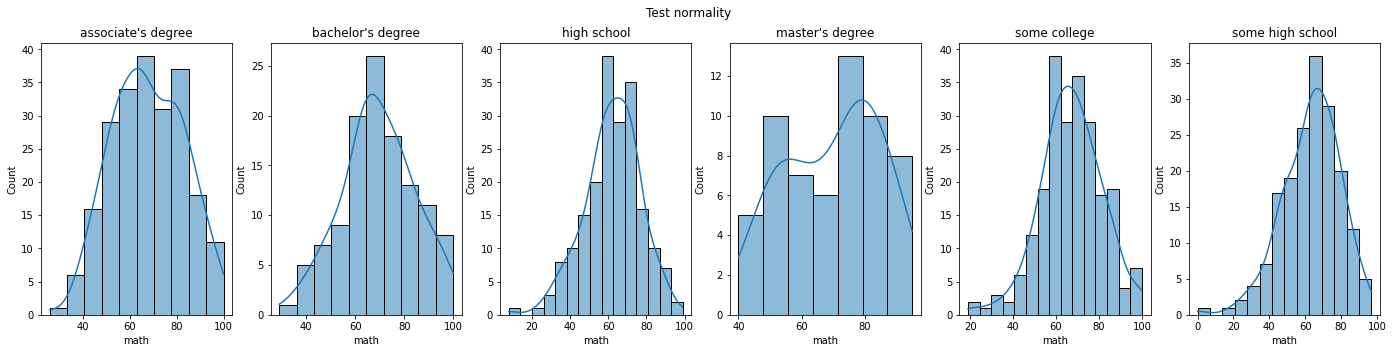

In [14]:
fig, axes = plt.subplots(ncols=len(list_level_name), figsize=(4*len(list_level_name), 5))
fig.suptitle('Test normality')

for i in range(len(list_level_name)):
    sns.histplot(df_level[df_level['parent_education_level']==list_level_name[i]]['math'],kde=True,ax=axes[i]).set(title=list_level_name[i])

In [15]:
print('p-value : ',stats.kruskal(df_level[df_level['parent_education_level']==list_level_name[0]]['math'], 
                                df_level[df_level['parent_education_level']==list_level_name[1]]['math'],
                                df_level[df_level['parent_education_level']==list_level_name[2]]['math'], 
                                df_level[df_level['parent_education_level']==list_level_name[3]]['math'],
                                df_level[df_level['parent_education_level']==list_level_name[4]]['math'],
                                df_level[df_level['parent_education_level']==list_level_name[5]]['math']).pvalue)
# differ 

p-value :  7.116153649862492e-05


At least 1 pair is different in median

In [16]:
data_level=[]

for i in list_level_name:
    data_level.append(df_level[df_level['parent_education_level']==i])

    # for i in list_race_name:
    # data_race.append(df_race[df_race['race/ethnicity']==i])

for i in range(len(data_level)-1):
    if i==0:
        start=1
    elif i==1:
        start=2
    elif i==2:
        start=3
    elif i==3:
        start=4
    elif i==4:
        start=5
    for j in range(start,len(data_level)):
        print(list_level_name[i] ,' vs ',list_level_name[j])
        print(list_level_name[i] ,' < ',list_level_name[j],'?')
        print('p-value : ',stats.ranksums(data_level[i]['math'], data_level[j]['math'],alternative='less').pvalue)
        if stats.ranksums(data_level[i]['math'], data_level[j]['math'],alternative='less').pvalue < 0.05:
            print('result ',list_level_name[i],' < ',list_level_name[j])
        else:
            print(list_level_name[i] ,' > ',list_level_name[j],'?')
            print('p-value : ',stats.ranksums(data_level[i]['math'], data_level[j]['math'],alternative='greater').pvalue)
            if stats.ranksums(data_level[i]['math'], data_level[j]['math'],alternative='greater').pvalue < 0.05:
                print('result ',list_level_name[i],' > ',list_level_name[j])
            else:
                print('result ',list_level_name[i],' = ',list_level_name[j])
        print('-'*40)
#wilcoxon rank sum test (one-tail)

associate's degree  vs  bachelor's degree
associate's degree  <  bachelor's degree ?
p-value :  0.17346632582686472
associate's degree  >  bachelor's degree ?
p-value :  0.8265336741731353
result  associate's degree  =  bachelor's degree
----------------------------------------
associate's degree  vs  high school
associate's degree  <  high school ?
p-value :  0.9996437520032231
associate's degree  >  high school ?
p-value :  0.00035624799677695565
result  associate's degree  >  high school
----------------------------------------
associate's degree  vs  master's degree
associate's degree  <  master's degree ?
p-value :  0.19971321324446056
associate's degree  >  master's degree ?
p-value :  0.8002867867555394
result  associate's degree  =  master's degree
----------------------------------------
associate's degree  vs  some college
associate's degree  <  some college ?
p-value :  0.61343870243404
associate's degree  >  some college ?
p-value :  0.3865612975659601
result  associate's d

some high school = high school < some college = associate's degree = bachelor's degree = master's degree

# Lunch

In [17]:
#Check normality

df_lunch = df[['lunch', 'math']]
list_lunch_name = sorted(df_lunch['lunch'].unique())

for i in list_lunch_name:
    print(i)
    print('len',i,' : ',len(df_lunch[df_lunch['lunch']==i]))
    print('p-value : ' , stats.kstest(df_lunch[df_lunch['lunch']==i]['math'], 'norm').pvalue)
    print('-'*40)

free/reduced
len free/reduced  :  355
p-value :  0.0
----------------------------------------
standard
len standard  :  645
p-value :  0.0
----------------------------------------


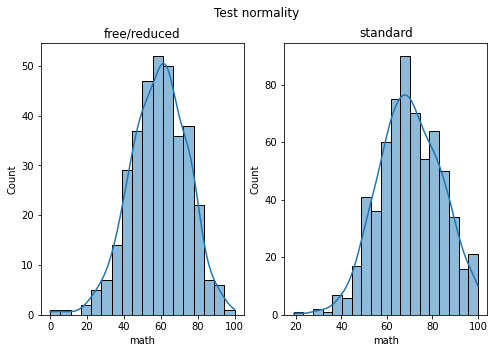

In [18]:
fig, axes = plt.subplots(ncols=len(list_lunch_name), figsize=(4*len(list_lunch_name), 5))
fig.suptitle('Test normality')

for i in range(len(list_lunch_name)):
    sns.histplot(df_lunch[df_lunch['lunch']==list_lunch_name[i]]['math'],kde=True,ax=axes[i]).set(title=list_lunch_name[i])

In [19]:
print('p-value : ',stats.ranksums(df_lunch[df_lunch['lunch']==list_lunch_name[0]]['math'], 
                                df_lunch[df_lunch['lunch']==list_lunch_name[1]]['math'],alternative='less').pvalue)
#wilcoxon rank sum test (one-tail)

p-value :  7.808419585076592e-27


free/reduced < standard

# test_prep_course

In [20]:
#Check normality

df_course = df[['test_prep_course', 'math']]
list_course_name = sorted(df_course['test_prep_course'].unique())

for i in list_course_name:
    print(i)
    print('len',i,' : ',len(df_course[df_course['test_prep_course']==i]))
    print('p-value : ' , stats.kstest(df_course[df_course['test_prep_course']==i]['math'], 'norm').pvalue)
    print('-'*40)

completed
len completed  :  358
p-value :  0.0
----------------------------------------
none
len none  :  642
p-value :  0.0
----------------------------------------


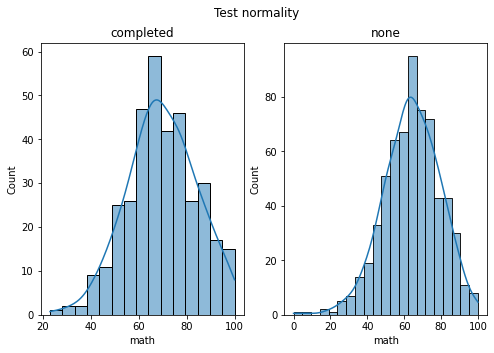

In [21]:
fig, axes = plt.subplots(ncols=len(list_course_name), figsize=(4*len(list_course_name), 5))
fig.suptitle('Test normality')

for i in range(len(list_course_name)):
    sns.histplot(df_course[df_course['test_prep_course']==list_course_name[i]]['math'],kde=True,ax=axes[i]).set(title=list_course_name[i])

In [22]:
print('p-value : ',stats.ranksums(df_course[df_course['test_prep_course']==list_course_name[0]]['math'], 
                                df_course[df_course['test_prep_course']==list_course_name[1]]['math'],alternative='greater').pvalue)
#wilcoxon rank sum test (one-tail)

p-value :  4.0331368950229926e-08


completed > none

# Summary part 1 : Median of 
- female < male
- A=B=C<D<E
- some high school = high school < some college = associate's degree = bachelor's degree = master's degree
- free/reduced < standard
- none < completed

# Part 2 : Which factor have the greatest impact on math scores?

# Gender

In [23]:
diff_med_gender = df_gender[df_gender['gender']=='male']['math'].median() - df_gender[df_gender['gender']=='female']['math'].median()

print('Median Diff (female vs male): ',diff_med_gender)

Median Diff (female vs male):  4.0


# Race

p-value :  0.0
Median Diff (A,B,C vs D):  5.5
Median Diff (D vs E):  5.5


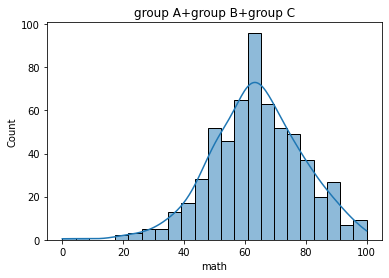

In [24]:
print('p-value : ' , stats.kstest(df_race[(df_race['race/ethnicity']=='group A')|
                        (df_race['race/ethnicity']=='group B')|
                        (df_race['race/ethnicity']=='group C') ]['math'], 'norm').pvalue)

sns.histplot(df_race[(df_race['race/ethnicity']=='group A')|
                        (df_race['race/ethnicity']=='group B')|
                        (df_race['race/ethnicity']=='group C')]['math'],kde=True).set(title=list_race_name[0]+'+'+list_race_name[1]+'+'+list_race_name[2])

diff_med_race_D = df_race[df_race['race/ethnicity']=='group D']['math'].median() - \
                df_race[(df_race['race/ethnicity']=='group A')|
                        (df_race['race/ethnicity']=='group B')|
                        (df_race['race/ethnicity']=='group C') ]['math'].median() 

diff_med_race_E = df_race[df_race['race/ethnicity']=='group E']['math'].median() - \
                df_race[(df_race['race/ethnicity']=='group D')]['math'].median()

print('Median Diff (A,B,C vs D): ',diff_med_race_E)
print('Median Diff (D vs E): ',diff_med_race_E)

# parent_education_level

p-value :  0.0
p-value :  0.0
Median Diff (low vs high):  4.0


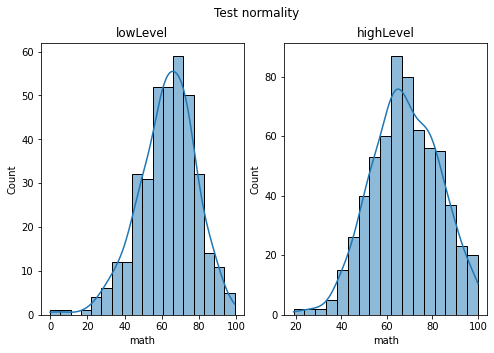

In [25]:
df_lowLevel = df_level[(df_level['parent_education_level']=='some high school')|
                        (df_level['parent_education_level']=='high school')]

df_highLevel = df_level[(df_level['parent_education_level']!='some high school')&
                        (df_level['parent_education_level']!='high school')]

print('p-value : ' , stats.kstest(df_lowLevel['math'], 'norm').pvalue)

print('p-value : ' , stats.kstest(df_highLevel['math'], 'norm').pvalue)

fig, axes = plt.subplots(ncols=2, figsize=(4*2, 5))
fig.suptitle('Test normality')

sns.histplot(df_lowLevel['math'],kde=True,ax=axes[0]).set(title='lowLevel')
sns.histplot(df_highLevel['math'],kde=True,ax=axes[1]).set(title='highLevel')

diff_med_level = df_highLevel['math'].median() - df_lowLevel['math'].median() 

print('Median Diff (low vs high): ',diff_med_level)

# lunch

In [26]:
diff_med_lunch = df_lunch[df_lunch['lunch']=='standard']['math'].median() - df_lunch[df_lunch['lunch']=='free/reduced']['math'].median() 

print('Median Diff (free/reduced vs standard): ',diff_med_lunch)

Median Diff (free/reduced vs standard):  9.0


# test_prep_course

In [27]:
diff_med_course = df_course[df_course['test_prep_course']=='completed']['math'].median() - df_course[df_course['test_prep_course']=='none']['math'].median() 

print('Median Diff (none vs completed): ',diff_med_course)

Median Diff (none vs completed):  5.0


# Summary part 2:order factor impacts on math scores (desc)

gender = parent_education_level < test_prep_course = race/ethnicity << lunch

In [28]:
diff_med_race = (diff_med_race_D + diff_med_race_E)/2

diff_med = [diff_med_gender,diff_med_race,diff_med_level,diff_med_lunch,diff_med_course]

for i in range(len(diff_med)):
    print(df.columns[:-1][i],' : ',diff_med[i])

gender  :  4.0
race/ethnicity  :  5.25
parent_education_level  :  4.0
lunch  :  9.0
test_prep_course  :  5.0
